**MTCNN**

In [1]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.1 MB/s 


Low Contrast: No


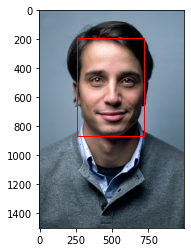

[(261, 193, 463, 676)]
Number of faces detected: 1 


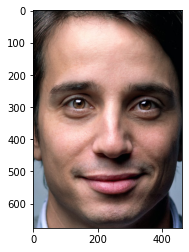

In [13]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
from PIL import Image
import cv2
import numpy as np

def contrast(img):
    #img = cv2.imread(filename)
    Y = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print(np.array(img))

    min = int(np.min(Y))
    max = int(np.max(Y))
    contrast = (max-min)/(max+min)
    return contrast

def face_detect(filename, faces):
    data=pyplot.imread(filename)
    pyplot.imshow(data)
    ax=pyplot.gca()

    for face in faces:
        x,y,width,height=face["box"]
        box=(x,y,width,height)
        b.append(box)
        #print(b)
        rect=Rectangle((x,y),width,height,fill=False,color="red")
        ax.add_patch(rect)
        #for key,value in face['keypoints'].items():
         #   dot=Circle(value,radius=1.5,color="yellow")
          #  ax.add_patch(dot)

    pyplot.show()

def crop(b):
    img=Image.open(filename)
    for bb in b:
        count=0
        box=bb
        box=(box[0],box[1],box[2]+box[0],box[3]+box[1])
        c=img.crop(box) #(left,upper,right,lower)
        #print(c.size)
        pyplot.imshow(c)
        c.save(f"sample_data/IM/cropped_image{box[0]}.jpg")
        count+=1
        downscale(c)
    print(f"Number of faces detected: {len(b)} ")


def downscale(img):
    basewidth=100
    wpercent=(basewidth/float(img.size[0]))
    #print(wpercent)
    hsize=int((float(img.size[1])*float(wpercent)))
    img5=img.resize((basewidth,hsize),Image.ANTIALIAS)
    img5.save(f"sample_data/IM/resized_image{img.size[0]}.jpg")
    #print(img5.size)

filename="images.jpg"
img=pyplot.imread(filename)
thresh=0.55

if(contrast(img) >= thresh):
    print("Low Contrast: No")
    b=[]
    detector=MTCNN()
    faces=detector.detect_faces(img)
    face_detect(filename, faces)
    print(b) #(left,right,width,height)
    crop(b)
else:
    print("Low Contrast: Yes")



*Contrast Changing*

In [ ]:
#Change the contrast of an image

from PIL import ImageEnhance
from skimage.exposure import is_low_contrast

im=Image.open("c2.jpeg")
im1=ImageEnhance.Contrast(im)
enhanced_im = im1.enhance(3.0)
enhanced_im.save("enhanced.jpg")

#is_low_contrast(im)
